In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

In [2]:
data = pd.read_csv("dataset1.csv") #reading the csv files using pandas

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.isnull().sum().head

<bound method NDFrame.head of label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64>

In [5]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer,normalize
y = data['label']
X = data.drop(columns='label')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X =pd.DataFrame(X)

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=40)

train accuracy:  0.9942857142857143 

test accuracy: 0.9097142857142857 



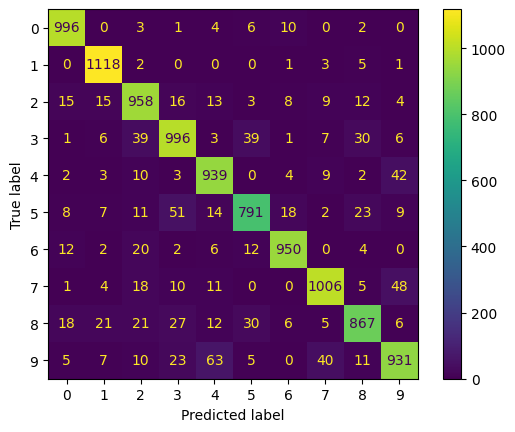

In [9]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_test = linear_svm.predict(X_test)
y_pred_train = linear_svm.predict(X_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

train accuracy:  0.9849523809523809 

 test accuracy: 0.9558095238095238 



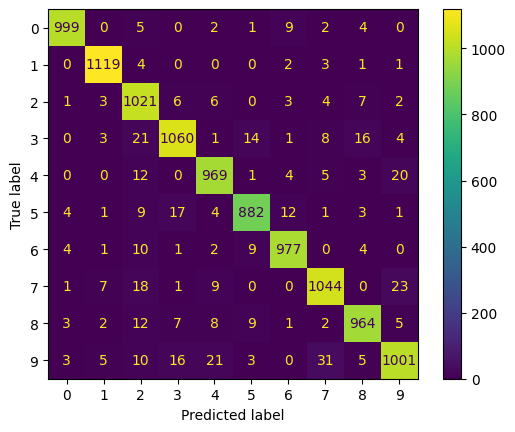

In [10]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_test = rbf_svm.predict(X_test)
y_pred_train = rbf_svm.predict(X_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print(" test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
param_grid = [ {
'C' :[0.5 , 1 ,5],
"gamma" : ['scale',0.5,0.001],
'kernel' :['rbf']},
]
model = SVC(kernel="rbf")
optimal_parameters =GridSearchCV(
model, param_grid,
cv=5,
scoring= 'accuracy',
verbose=10,
n_jobs= -1,
return_train_score=True
)
optimal_parameters.fit(X_train,y_train)
print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

In [ ]:
cv_results = pd.DataFrame(optimal_parameters.cv_results_)
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')
# # plotting
plt.figure(figsize=(16,8))
# subplot 1/3
plt.subplot(131)
gamma_scale = cv_results[cv_results['param_gamma']=='scale']
plt.plot(gamma_scale["param_C"], gamma_scale["mean_test_score"])
plt.plot(gamma_scale["param_C"], gamma_scale["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=scale")
plt.ylim([0.40, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.5]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.5")
plt.ylim([0.40, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 3/3
plt.subplot(133)
gamma_5 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_5["param_C"], gamma_5["mean_test_score"])
plt.plot(gamma_5["param_C"], gamma_5["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.40, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

train accuracy:  0.9978412698412699 

accuracy: 0.9648571428571429 



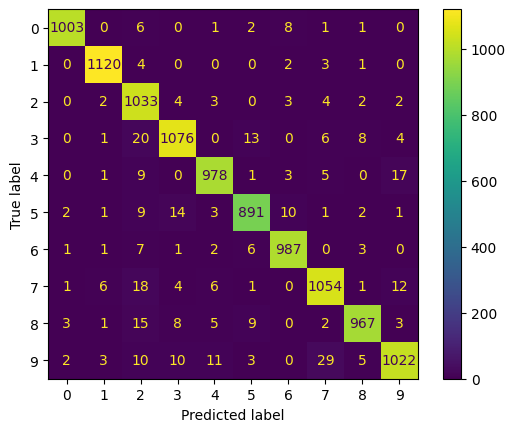

In [12]:
rbf_svm_better = SVC(C=5, gamma='scale',kernel='rbf')
rbf_svm_better.fit(X_train, y_train)
y_pred_test = rbf_svm_better.predict(X_test)
y_pred_train = rbf_svm_better.predict(X_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test),"\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.9674920634920635 

Test accuracy: 0.9317142857142857 



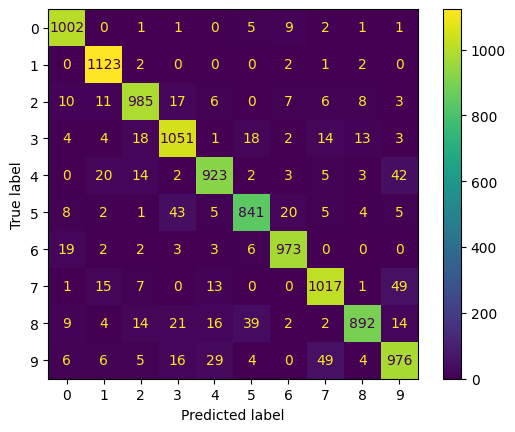

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
model= KNeighborsClassifier()
param_grid = [{'n_neighbors': np.arange(1, 20)}]
optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -1,
    return_train_score=True
)
optimal_parameters.fit(X_train,y_train)
print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

In [ ]:
cv_results = pd.DataFrame(optimal_parameters.cv_results_)
# print(cv_results)
# # converting C to numeric type for plotting on x-axis
cv_results['param_n_neighbors']=cv_results['param_n_neighbors'].astype('int')
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.plot(cv_results["param_n_neighbors"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_neighbors"], cv_results["mean_train_score"])
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title("KNN")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.show()

In [ ]:
from sklearn.neighbors import NearestCentroid
ncc_model = NearestCentroid()
ncc_model.fit(X_train, y_train)
y_pred_test = ncc_model.predict(X_test)
y_pred_train = ncc_model.predict(X_train)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
print(f"Test Set Score : {ncc_model.score(X_test, y_test) * 100} %")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()